# Data Analysis Insights and Visualization
WeRateDogs is a popular twitter account where users post a picture for a dog and it take a rate from 10.

In [10]:
#Import needed liberarie
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('arch_img_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['tweet_id'] = df['tweet_id'].astype('str')


### Most popular dog names

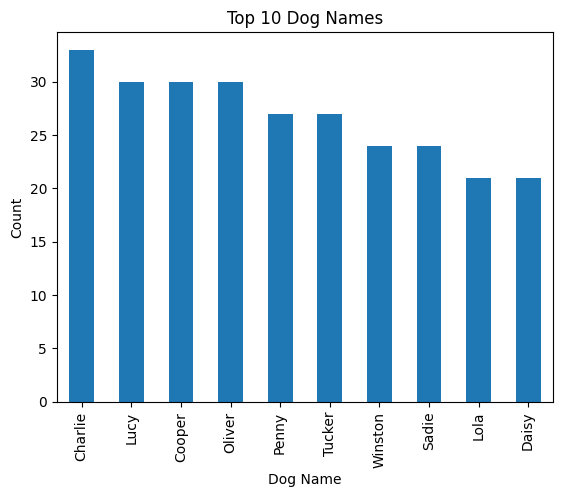

In [11]:
#Top 10 dog names
df['name'].value_counts().nlargest(10).plot(kind = 'bar')
plt.xlabel('Dog Name')
plt.ylabel('Count')
plt.title("Top 10 Dog Names");

### Dog Image First Prediction Result

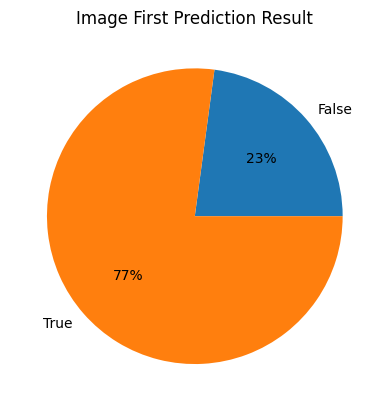

In [21]:
df[df['prediction_level'] == 1].groupby('breed').size().plot(kind = 'pie', autopct='%1.0f%%')

plt.title("Image First Prediction Result");


> We noticed that 23% of tweets with False dog prediction while actually there are some tweets has dog pictures.
> In further analysis we need to check how much image has dog of 305 False predication to represent the actual accuracy  of prediction tool

### Most dogs breed predicted 

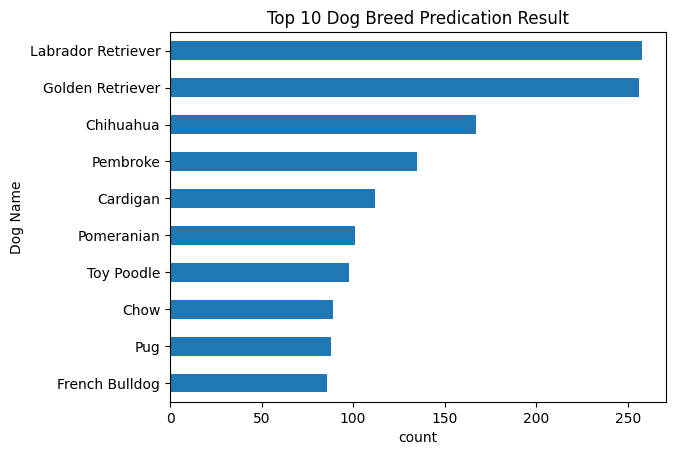

In [15]:
df['prediction'].value_counts().nlargest(10).sort_values().plot(kind = 'barh');
plt.ylabel('Dog Name')
plt.xlabel('count')
plt.title('Top 10 Dog Breed Predication Result');

### Users interaction with tweets over time

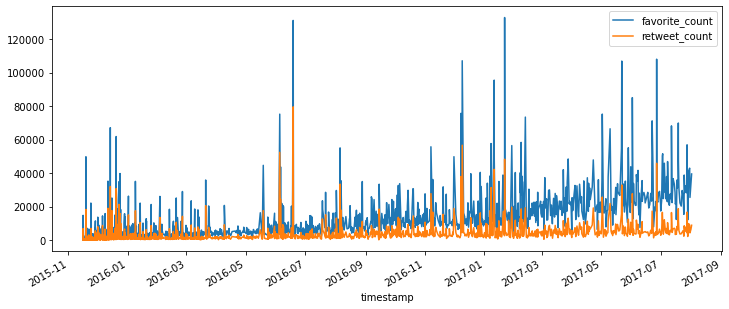

In [2]:
df.plot(x='timestamp', y = ['favorite_count','retweet_count'], figsize = (12,5));

> Favorite counts increased more than retweets counts over time

### Users interaction with tweets over time month intervals

No handles with labels found to put in legend.


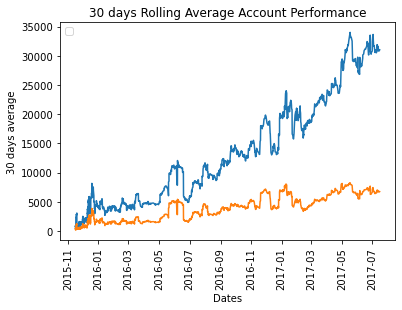

In [9]:
y1= df.favorite_count.rolling(window = 30).mean()
# set a 30 days rolling average for retweet count
y2= df.retweet_count.rolling(window = 30).mean()
x = df.timestamp
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation = 90)
plt.title('30 days Rolling Average Account Performance')
plt.xlabel('Dates')
plt.ylabel('30 days average')
plt.legend(loc=2);

> To make smooth line graph we select monthly time interval and now it's became more clear that there is positive correlation between favorite count and time 

### Most dog stage posted on [WeRateDogds](https://twitter.com/dog_rates)

In [4]:
df.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.00,12.0,13.0,14.0
doggo-floofer,1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
doggo-pupper,8.0,11.000000,2.563480,5.0,11.50,12.0,12.0,13.0
doggo-puppo,1.0,13.000000,NaN,13.0,13.00,13.0,13.0,13.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,201.0,10.638159,1.736025,3.0,10.00,11.0,12.0,14.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


- Although pupper is the most dog stage appeared in photos with single dog (201 time) and it also get the lowest mean rating (10.6)
- Despite floofer appeared less than any other dog it always has rating above 10 

### Tweets distribution over Day/Week and Month/Year

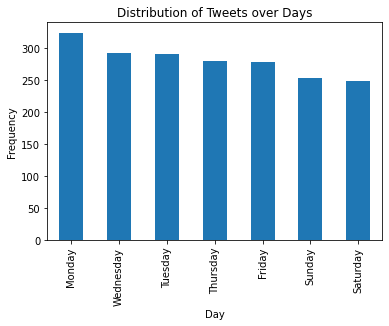

In [6]:
#extarct the day_name
df['day_name'] = df.timestamp.apply(lambda x: x.day_name())

df.day_name.value_counts().plot(kind ='bar')
plt.title("Distribution of Tweets over Days")
plt.xlabel('Day')
plt.ylabel('Frequency');


> It was unpredictable to see the most popular day for posting a tweet is **(Monday)** where people come back to work as we expect to be during weekends **(Saturday and Sunday)**
> Also Weekends has the less interacting as may be people leave the social networks and go to enjoy with real life

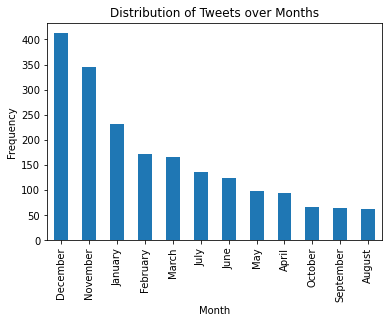

In [8]:
# extract the month name
df['month'] = df.timestamp.apply(lambda x: x.month_name())

df.month.value_counts().plot(kind = 'bar')
plt.title("Distribution of Tweets over Months")
plt.xlabel('Month')
plt.ylabel('Frequency');

> Most interacting was in **December** during long Christmas vacation as schools and colleges shut down for two weeks

> **November** is the second rank as they is Thanksgiving vacation at the end of the month 
